# Fragment Prediction Accuracy

In [1]:
# Read results from fragment prediction output
# explain the file formating here ----
# import modules
import pandas as pd

In [2]:
inputfile = open('prediction_ac_frag.dat', 'r')
count = 0
emdb, resoln, fragname, fraglen, fragtype, rank, correctPred, correctPred_0 = list(), list(), list(), list(), list(), list(), list(), list()
for line in inputfile:
    if len(line) > 20:
        line_ = line.split("|")
        line_part1 = line_[0].strip().split(' ')
        emdb.append(line_part1[0])
        resoln.append(float(line_part1[1]))
        fragname.append(line_part1[2])
        line_part12 = line_part1[2].split('_')
        fraglen_ =int(line_part12[-1])
        fraglen.append(fraglen_)
        fragtype.append(line_part12[0])
        rank_ = int(line_[1].strip().split(' ')[0])
        rank.append(rank_)
        if rank_ < fraglen_/2:
            correctPred.append(1)
        else:
            correctPred.append(0)
            
        if rank_ == 0:
            correctPred_0.append(1)
        else:
            correctPred_0.append(0)

# generate a dataframe
frag_dict = {"EMDB": emdb, "Resolution": resoln,
             "FragName": fragname, "FragLen": fraglen,
             "FragType": fragtype, "Rank": rank, "CorrectPred": correctPred, "CorrectPred_0": correctPred_0}

frag_df = pd.DataFrame.from_dict(frag_dict)
frag_df.head(10)
# workflow
# 1. extract type of fragment; length of the fragment from the fragment name
# 2. extract ranking, if ranking is within len/2, assume that the prediction is correct.
# 3. Calculate accuracy based on the length of the fragment, where accuracy is defined as number of correct frag/total number of fragments

,EMDB,Resolution,FragName,FragLen,FragType,Rank,CorrectPred,CorrectPred_0
0,EMD-11309,4.3,H_A_170_11,11,H,132,0,0
1,EMD-11309,4.3,H_A_197_16,16,H,0,1,1
2,EMD-11309,4.3,H_A_226_19,19,H,0,1,1
3,EMD-11309,4.3,H_A_249_14,14,H,92,0,0
4,EMD-11309,4.3,H_A_272_12,12,H,0,1,1
5,EMD-11309,4.3,H_A_296_10,10,H,0,1,1
6,EMD-11309,4.3,H_A_328_8,8,H,280,0,0
7,EMD-11309,4.3,H_A_342_14,14,H,0,1,1
8,EMD-11309,4.3,H_A_360_15,15,H,0,1,1
9,EMD-11309,4.3,H_A_396_8,8,H,444,0,0


Overall Accuracy 77.75614295068408
ResBins
3-4    83.4
4-5    55.5
5-6    43.2
6-7    38.7
7-8    27.2
Name: CorrectPred, dtype: float64
Overall Helix 79.4584792396198
Overall Sheet 75.66602687140114
ResBins
3-4    80.6
4-5    42.3
5-6    21.2
6-7    16.4
7-8     7.8
Name: CorrectPred, dtype: float64


/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4732/1946914133.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_H_res = round(frag_df_helix.groupby(['ResBins'])['CorrectPred'].mean()*100, 1)
/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4732/1946914133.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_S_res = round(frag_df_sheet.groupby(['ResBins'])['CorrectPred'].mean()*100, 1)


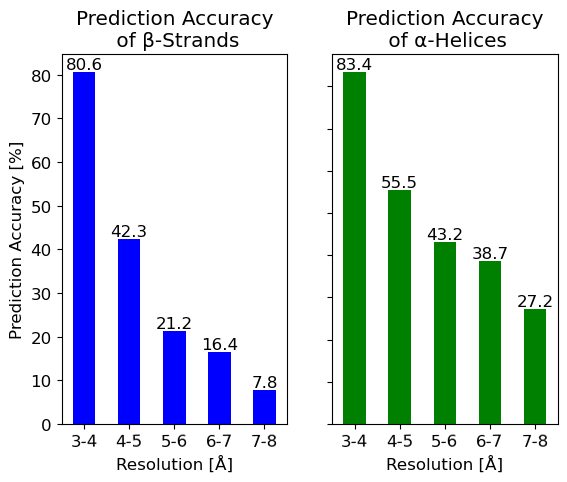

In [4]:
# Bin the data with respect to Resolution
bins_ = [3,4,5,6,7,8]
labels_ = ['3-4', '4-5', '5-6', '6-7', '7-8']
frag_df['ResBins'] = pd.cut(frag_df['Resolution'], bins=bins_, labels=labels_)
overall_accu = frag_df['CorrectPred'].mean()*100
print("Overall Accuracy", overall_accu)
#frag_df
# Group data with respect to fragment type
frag_df_sheet = frag_df[frag_df['FragType'] == 'S'] 
frag_df_helix = frag_df[frag_df['FragType'] == 'H']
# Groupby ResBins column and get mean with respect to CorrectPred (mean is here accuracy)
result_H_res = round(frag_df_helix.groupby(['ResBins'])['CorrectPred'].mean()*100, 1)
print(result_H_res)
overall_H = frag_df_helix['CorrectPred'].mean()*100
print("Overall Helix", overall_H)
result_S_res = round(frag_df_sheet.groupby(['ResBins'])['CorrectPred'].mean()*100, 1)
overall_S = frag_df_sheet['CorrectPred'].mean()*100
print("Overall Sheet", overall_S)
print(result_S_res)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
# Set global font size
plt.rcParams['font.size'] = 12  # Adjust the number as needed
title_S_res = "Prediction Accuracy\n of β-Strands"
bar_s = result_S_res.plot.bar(ax = axs[0], sharey=True, xlabel='Resolution [Å]', ylabel='Prediction Accuracy [%]', rot=True, title=title_S_res, color='blue')
bar_s.bar_label(bar_s.containers[0], label_type='edge')

title_H_res = "Prediction Accuracy\n of α-Helices"
bar_H = result_H_res.plot.bar(ax = axs[1], sharey=True, xlabel='Resolution [Å]', ylabel='Prediction Accuracy [%]', rot=True, title=title_H_res, color='green')
bar_H.bar_label(bar_H.containers[0], label_type='edge')
    
plt.savefig("FragPrediction_Accuracy_vsResolution.png")

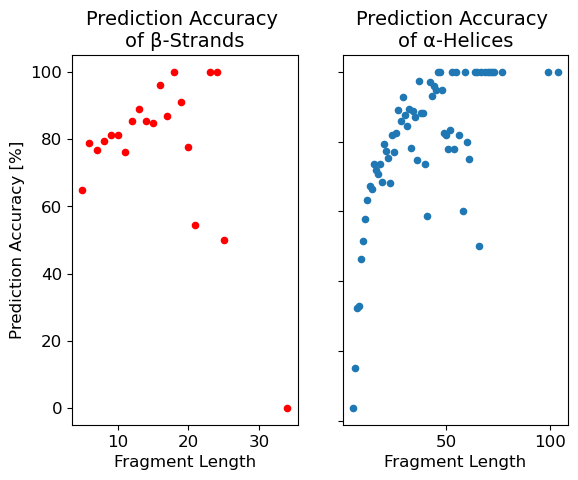

In [5]:
# Groupby FragLen columns and get mean with respect to CorrectPred (mean is here accuracy)
result_H_len = frag_df_helix.groupby(['FragLen'])['CorrectPred'].agg(['mean', 'count']).reset_index()
result_H_len['Accuracy'] = result_H_len['mean']*100
result_H_len.drop(result_H_len.index[result_H_len['count'] == 1], inplace = True)
#result_H_len = result_H_len[result_H_len.count != 1]
#print(result_H_len)
#print('===========')
result_S_len = frag_df_sheet.groupby(['FragLen'])['CorrectPred'].agg(['mean', 'count']).reset_index()
result_S_len['Accuracy'] = result_S_len['mean']*100
result_S_len.drop(result_S_len.index[result_S_len['count'] == 1], inplace = True)
#result_S_len = result_S_len[result_S_len.count != 1]
fig, axs = plt.subplots(1, 2)
# Set global font size
#plt.rcParams['font.size'] = 14  # Adjust the number as needed
plt.rcParams['axes.titlesize']=14 #for axis titles
plt.rcParams['xtick.labelsize']=12 #for x-axis tick labels
plt.rcParams['ytick.labelsize']=12 #for y-axis tick labels

plt.xlabel
title_S_len = "Prediction Accuracy \nof β-Strands"
result_S_len.plot.scatter(x= 'FragLen', y='Accuracy', ax = axs[0], sharey=True, xlabel='Fragment Length', ylabel='Prediction Accuracy [%]', title=title_S_len, color='red')
title_H_len = "Prediction Accuracy \nof α-Helices"
result_H_len.plot.scatter(x= 'FragLen', y='Accuracy', ax = axs[1], sharey=True, xlabel='Fragment Length', ylabel='Prediction Accuracy [%]', title=title_H_len)
plt.savefig("Frag_Prediction_vs_fraglen.png")

# Prediction Accuracy for when correct sequence is ranked 1

Overall Accuracy 71.60802288313747
ResBins
3-4    78.6
4-5    45.0
5-6    32.6
6-7    27.5
7-8    12.1
Name: CorrectPred_0, dtype: float64
Overall Helix 73.91508254127064
Overall Sheet 68.77543186180422
ResBins
3-4    73.9
4-5    32.1
5-6    11.2
6-7    10.8
7-8     6.5
Name: CorrectPred_0, dtype: float64


/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_3234/2076774460.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_H_res = round(frag_df_helix.groupby(['ResBins'])['CorrectPred_0'].mean()*100, 1)
/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_3234/2076774460.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_S_res = round(frag_df_sheet.groupby(['ResBins'])['CorrectPred_0'].mean()*100, 1)


[Text(0, 0, '78.6'),
 Text(0, 0, '45'),
 Text(0, 0, '32.6'),
 Text(0, 0, '27.5'),
 Text(0, 0, '12.1')]

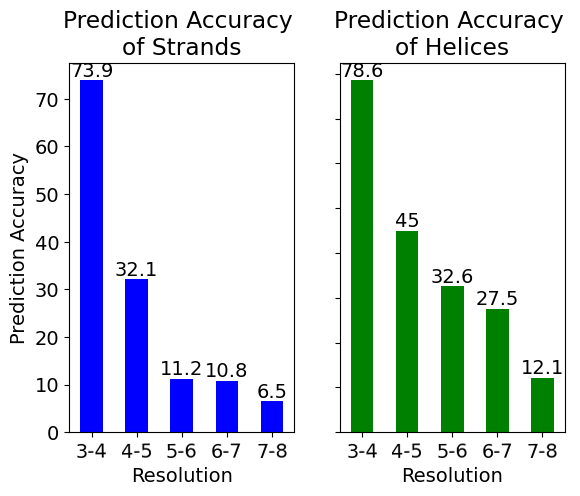

In [10]:
# Bin the data with respect to Resolution
bins_ = [3,4,5,6,7,8]
labels_ = ['3-4', '4-5', '5-6', '6-7', '7-8']
frag_df['ResBins'] = pd.cut(frag_df['Resolution'], bins=bins_, labels=labels_)
overall_accu = frag_df['CorrectPred_0'].mean()*100
print("Overall Accuracy", overall_accu)
#frag_df
# Group data with respect to fragment type
frag_df_sheet = frag_df[frag_df['FragType'] == 'S'] 
frag_df_helix = frag_df[frag_df['FragType'] == 'H']
# Groupby ResBins column and get mean with respect to CorrectPred (mean is here accuracy)
result_H_res = round(frag_df_helix.groupby(['ResBins'])['CorrectPred_0'].mean()*100, 1)
print(result_H_res)
overall_H = frag_df_helix['CorrectPred_0'].mean()*100
print("Overall Helix", overall_H)
result_S_res = round(frag_df_sheet.groupby(['ResBins'])['CorrectPred_0'].mean()*100, 1)
overall_S = frag_df_sheet['CorrectPred_0'].mean()*100
print("Overall Sheet", overall_S)
print(result_S_res)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)

title_S_res = "Prediction Accuracy \nof Strands"
bar_s = result_S_res.plot.bar(ax = axs[0], sharey=True, xlabel='Resolution', ylabel='Prediction Accuracy', rot=True, title=title_S_res, color='blue')
bar_s.bar_label(bar_s.containers[0], label_type='edge')

title_H_res = "Prediction Accuracy \nof Helices"
bar_H = result_H_res.plot.bar(ax = axs[1], sharey=True, xlabel='Resolution', ylabel='Prediction Accuracy', rot=True, title=title_H_res, color='green')
bar_H.bar_label(bar_H.containers[0], label_type='edge')

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()